In [4]:
# 모듈 로딩
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from tensorflow.keras import Sequential
from sklearn.utils import all_estimators
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from urllib.request import urlopen,Request,urlretrieve
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [38]:
DIR='./color_image.csv'
DIR1='./black_white_image.csv'
DIR2='./target.csv'

colDF=pd.read_csv(DIR)
blaDF=pd.read_csv(DIR1)
tarDF=pd.read_csv(DIR2)

In [6]:
colDF.info()
colDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Columns: 2500 entries, 0 to 2499
dtypes: float64(2500)
memory usage: 82.2 MB


,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,0.109804,0.094118,0.098039,0.760784,0.756863,0.760784,1.000000,1.000000,1.000000,1.000000
1,0.094118,0.094118,0.094118,0.592157,0.592157,0.592157,1.000000,1.000000,1.00000,1.000000,...,0.972549,0.972549,0.972549,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.819608
2,0.423529,0.419608,0.431373,0.984314,0.984314,0.984314,0.870588,0.870588,0.87451,0.921569,...,0.400000,0.396078,0.411765,0.435294,0.431373,0.447059,0.635294,0.631373,0.639216,0.796078
3,0.094118,0.094118,0.094118,0.592157,0.592157,0.592157,1.000000,1.000000,1.00000,1.000000,...,0.972549,0.972549,0.972549,0.741176,0.741176,0.745098,0.996078,0.996078,0.996078,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,0.964706,0.964706,0.964706,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.811765


In [7]:
colDF=colDF.to_numpy()
blaDF=blaDF.to_numpy()

In [8]:
colDF=colDF/255.0

In [9]:
colDF.shape , blaDF.shape

((4312, 2500), (4312, 2500))

In [10]:
a = colDF[2000].reshape(50,50)

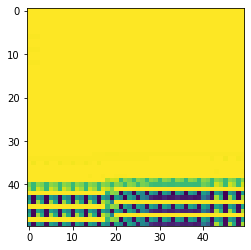

In [11]:
plt.imshow(a)
plt.show()

In [12]:
b = blaDF[2000].reshape(50,50)

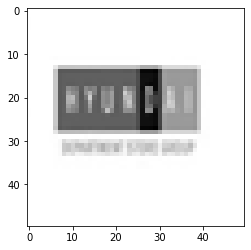

In [13]:
plt.imshow(b, cmap='gray')
plt.show()

In [14]:
# 크롤링 데이터 로테이션시키는 함수
def rota_save(color,foldname):
    # 폴더 만들기
    if not os.path.exists('./'+foldname):
        os.makedirs(foldname)
    
    rotation=[45,90,135,180,225,270,315]
    for file in os.listdir('./data/'):
        for rot in rotation:
            img=np.array(Image.open('./data/'+file).convert(color))
            rows,cols = img.shape[0:2]
            ro_mt = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1.42)
            ro_img = cv2.warpAffine(img, ro_mt,(cols, rows))
            
            # 이미지 저장
            filename=f"{file}_ro{str(rot)}"
            cv2.imwrite('./'+foldname+'/'+filename+'.png',ro_img)

In [15]:
# 크롤링 데이터 convert 함수
def data_con(color,foldname):
    for file in os.listdir('./data/'):
        img=Image.open('./data/'+file).convert(color).save('./'+foldname+'/'+file)

In [16]:
# 흑백으로 로테이션
rota_save('L','blwh')

In [17]:
# rgb로 로테이션
rota_save('RGB','rgb')

In [18]:
# 원본사진 흑백으로
data_con('L','blwh')

In [19]:
# 원본사진 색깔로
data_con('RGB','rgb')

In [20]:
def solution(foldname):
    l=[]
    for i in os.listdir('./'+foldname+'/'):
        n=np.array(Image.open('./'+foldname+'/'+i))/255.0
        if foldname=='blwh':
           n_list=n.reshape(-1,50*50)[0].tolist()
        else:
            n_list=n.reshape(-1,50*50,3)[0].tolist()
        l.append(n_list)
    return np.array(l)

In [21]:
blwh=solution('blwh')
blwh

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.09411765, 0.59215686, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.42352941, 0.98431373, 0.87058824, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.75294118, 0.52941176, 0.34901961, ..., 0.69803922, 0.83921569,
        0.97254902],
       [0.99215686, 0.99607843, 0.99607843, ..., 0.94509804, 0.99215686,
        0.99215686],
       [0.30980392, 0.30980392, 0.30980392, ..., 0.30980392, 0.30980392,
        0.30980392]])

In [22]:
rgb=solution('rgb')
rgb

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.09411765, 0.09411765, 0.09411765],
        [0.59215686, 0.59215686, 0.59215686],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.42352941, 0.41960784, 0.43137255],
        [0.98431373, 0.98431373, 0.98431373],
        [0.87058824, 0.87058824, 0.8745098 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.74901961, 0.74509804, 0.76078431],
        [0.52156863, 0.52156863, 0.55294118],
        [0.34117647, 0

In [24]:
# pd.DataFrame(a).to_csv('black_white_image.csv',index=False)

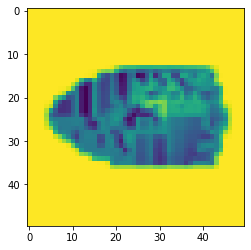

In [26]:
plt.imshow(blwh[3500].reshape(50,50,1))

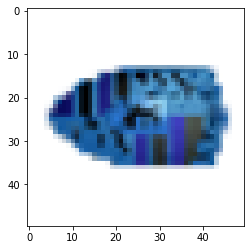

In [27]:
plt.imshow(rgb[3500].reshape(50,50,3))

In [39]:
tarDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4312 non-null   object
 1   label   4312 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.5+ KB


In [45]:
tarDF=np.array(tarDF.label)

In [46]:
tarDF

array([ 0,  0,  0, ..., 25, 25, 25], dtype=int64)

In [49]:
blwh

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.09411765, 0.59215686, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.42352941, 0.98431373, 0.87058824, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.75294118, 0.52941176, 0.34901961, ..., 0.69803922, 0.83921569,
        0.97254902],
       [0.99215686, 0.99607843, 0.99607843, ..., 0.94509804, 0.99215686,
        0.99215686],
       [0.30980392, 0.30980392, 0.30980392, ..., 0.30980392, 0.30980392,
        0.30980392]])

In [50]:
# 주성분,

In [29]:
# # 정규식을 활용한 브랜드 이름 분리
# import re

# brand_name=[]
# for b in os.listdir('./rgb/'):
#     l=re.split(r'[0-9]',b)[0]
#     brand_name.append(l)
# brand_name

In [30]:
# # 브랜드 이름 타겟으로 저장
# com_brand='angelinus'
# i=0
# target=[]
# for brand in brand_name:
#     if com_brand==brand:
#         target.append([brand,i])
#     else:
#         i+=1
#         com_brand=brand
#         target.append([brand,i])

In [31]:
# target_df=pd.DataFrame(target,columns=['name','label'])
# target_df